In [44]:
import numpy as np
import cv2 as cv
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from skimage import data
from scipy import ndimage
import matplotlib.pyplot as plt
import segmentation_utils

image = cv.imread('image.jpg')
image_hsv = cv.cvtColor(image, cv.COLOR_RGB2HSV)
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

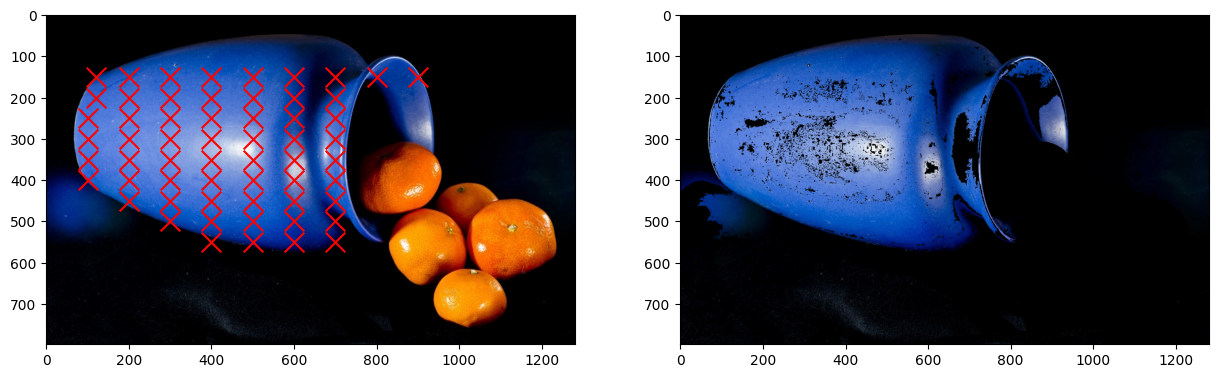

In [45]:
seeds = [(200, 120),(200, 200), (200, 300), (200, 400), (200, 500), (200, 600), (200, 700),
         (150, 120),(150, 200), (150, 300), (150, 400), (150, 500), (150, 600), (150, 700),(150, 800),(150, 900),
         (250, 100),(250, 200), (250, 300), (250, 400), (250, 500), (250, 600), (250, 700),
         (300, 100),(300, 200), (300, 300), (300, 400), (300, 500), (300, 600), (300, 700),
         (400, 100),(400, 200), (400, 300), (400, 400), (400, 500), (400, 600), (400, 700),
         (350, 100),(350, 200), (350, 300), (350, 400), (350, 500), (350, 600), (350, 700),
                    (450, 200), (450, 300), (450, 400), (450, 500), (450, 600), (450, 700),
                                (500, 300), (500, 400), (500, 500), (500, 600), (500, 700),
                                            (550, 400), (550, 500), (550, 600), (550, 700)]

x = list(map(lambda x: x[1], seeds))
y = list(map(lambda x: x[0], seeds))

threshold = 115

segmented_region = segmentation_utils.region_growingHSV(image_hsv, seeds, threshold)

result = cv.bitwise_and(image, image, mask=segmented_region)

plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.scatter(x, y, marker="x", color="red", s=200)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.show()